In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set()

In [6]:
excel_file = 'https://www.svk.se/siteassets/1.om-kraftsystemet/kraftsystemdata/statistik/forbrukning-tillforsel-per-timme/n_fot2021-01-12.xls'

In [7]:
el = pd.ExcelFile(excel_file)

HTTPError: HTTP Error 404: Not Found

In [20]:
el.sheet_names

['Förb + prod i Sverige']

In [21]:
el_df = el.parse(el.sheet_names[0],skiprows=6,parse_dates=True,index_col=0)
el_df = el_df.resample('d').mean()
el_df

,Total förbrukning,Vindkraft,Vattenkraft,Kärnkraft,Övr.värmekraft,Ospec. prod.,Solkraft,Total produktion,Import/export
Tid,,,,,,,,,
2021-01-01,-16286.204663,515.817608,11007.338633,6727.387083,1109.154855,47.340521,0.767614,19407.806315,-3107.121993
2021-01-02,-16761.642942,306.308768,11113.375408,6727.875833,1137.658068,47.083778,0.627177,19332.929032,-2570.938692
2021-01-03,-17483.947715,2219.895637,10477.608067,6726.906250,1107.769281,42.180443,2.001254,20576.360932,-3093.909031
2021-01-04,-19640.539027,2274.728558,11442.752649,6718.135000,1398.075718,60.617998,1.607285,21895.917207,-2257.181708
2021-01-05,-19709.237115,1614.233400,10830.750548,6718.368750,1388.289360,62.578541,0.945131,20615.165730,-907.254620
...,...,...,...,...,...,...,...,...,...
2021-12-27,-20992.260080,2823.121620,11216.423845,6885.728333,1690.160520,68.439937,4.511838,22688.386094,-1707.140208
2021-12-28,-20228.459434,4360.771679,10303.370149,6679.894167,1671.586459,65.531405,0.444549,23081.598408,-2863.285508
2021-12-29,-19233.827164,644.793271,11760.698094,6686.887958,1651.987132,84.964768,0.657080,20829.988303,-1600.314159


In [22]:
theta_per_day = 360/365

In [23]:
def map_time_to_theta(arr,time_unit):
    return np.deg2rad(arr.dayofyear * time_unit)



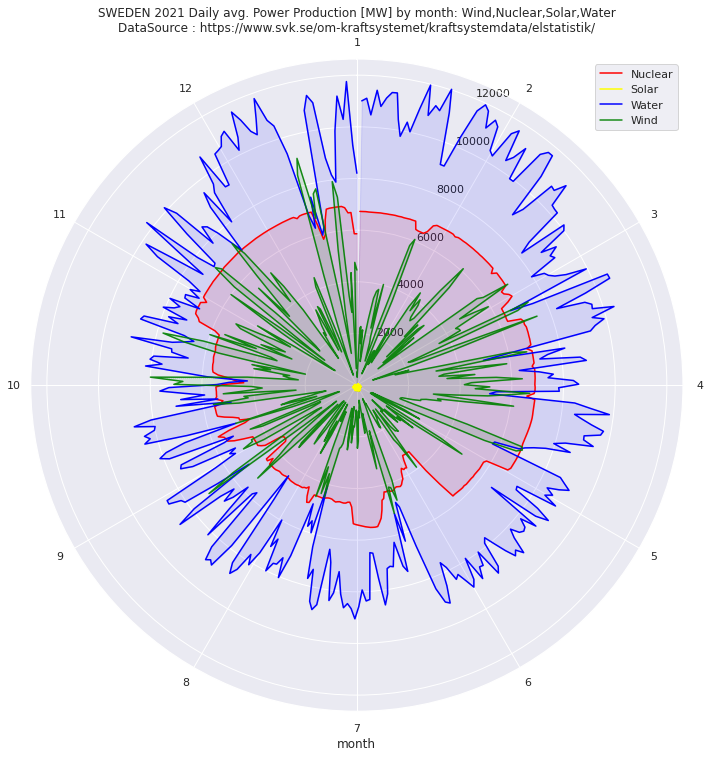

In [24]:
fig = plt.figure(figsize=(18,12))
ax = plt.subplot(111,projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

plt.title('SWEDEN 2021 Daily avg. Power Production [MW] by month: Wind,Nuclear,Solar,Water\nDataSource : https://www.svk.se/om-kraftsystemet/kraftsystemdata/elstatistik/')

ax.set_xticks (np.linspace(0,2*np.pi,12,endpoint=False))
ax.set_xticklabels(range(1,13),rotation=90)

ax.plot(map_time_to_theta(el_df.index,theta_per_day),el_df['Kärnkraft'],alpha=1,
        label='Nuclear',color='red')
ax.fill_between(map_time_to_theta(el_df.index,theta_per_day),el_df['Kärnkraft'],alpha=0.1,color='red')

ax.plot(map_time_to_theta(el_df.index,theta_per_day),el_df['Solkraft'],alpha=1,
        label='Solar',color='yellow')
ax.fill_between(map_time_to_theta(el_df.index,theta_per_day),el_df['Solkraft'],alpha=1,color='yellow')

ax.plot(map_time_to_theta(el_df.index,theta_per_day),el_df['Vattenkraft'],alpha=1,color='blue',
       label='Water')

ax.fill_between(map_time_to_theta(el_df.index,theta_per_day),el_df['Vattenkraft'],alpha=0.1,color='blue')

ax.plot(map_time_to_theta(el_df.index,theta_per_day),el_df['Vindkraft'],alpha=0.9,
       label='Wind',color='green')
ax.fill_between(map_time_to_theta(el_df.index,theta_per_day),el_df['Vindkraft'],alpha=0.1,
                color='green')

ax.legend(loc='upper right')
ax.set_xlabel('month')

'''
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
'''


#ax.plot(map_time_to_theta(el_df.index,theta_per_day),el_df['Solkraft'],alpha=0.5,marker='o',ls='dashed')
#ax.plot(map_time_to_theta(el_df.index,theta_per_day),el_df['Kärnkraft'],alpha=0.5,marker='o')
#ax.plot(map_time_to_theta(el_df.index,theta_per_day),el_df['Vattenkraft'],alpha=0.5,marker='o')

plt.savefig('elproduktion.jpg',format='jpg')



In [28]:
el_df.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Tid', length=365, freq='D')